# CS 3310 Notebook

## Libraries
### Install needed libraries

In [ ]:
%%capture

!pip install tensorflow --upgrade --user
!pip install keras==2.3.0 --user
!pip install imutils --user
!pip install opencv-python --user

### Import needed libraries

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import numpy as np
import cv2
from tensorflow.keras.preprocessing.image import load_img

from preliminary_caching import has_cached_emotions, cache_emotions, read_cached_emotions
from face_extractor import get_face_bounding_boxes, extract_faces

### Cell that loads all data in a partition as a map that maps an examples ID to its emotion.

In [3]:
def display_image(image_id):
    
    image = mpimg.imread(f"/data/datasets/affectNet/train_set/images/{image_id}.jpg")
    plt.imshow(image)
    plt.show()

In [4]:
def display_face_extraction(image_id):
    
    image = mpimg.imread(f"/data/datasets/affectNet/val_set/images/{image_id}.jpg")
    bounds = get_face_bounding_boxes(image, 0.0, 1)
    
    print(bounds)
    extracted_face = extract_faces(image, bounds)[0]
    
    plt.imshow(extracted_face)
    plt.show()

In [5]:
if not has_cached_emotions():
    cache_emotions()

validation_examples = read_cached_emotions("validation")

In [6]:
image_id = list(validation_examples.keys())[random.randint(0, len(validation_examples))]
print(image_id)

130


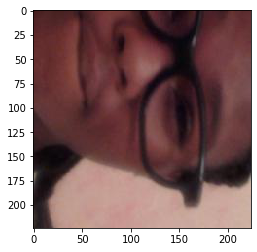

3999


In [7]:
display_image(375709)
print(len(validation_examples))

[(0.9998802, 18, 0, 210, 210)]


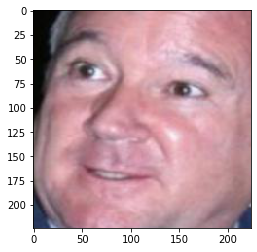

In [183]:
display_face_extraction(image_id)

Below block creates CNN that we will be using. Possibly replace with pretrained architecture in the future.

In [ ]:
# serialize model structure to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

In [ ]:
# plot the evolution of Loss and Acuracy on the train and validation sets

import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

### TODO: Havent touched anything down below yet.

In [ ]:
# show the confusion matrix of our predictions

# compute predictions
predictions = model.predict_generator(generator=validation_generator)
y_pred = [np.argmax(probas) for probas in predictions]
y_test = validation_generator.classes
class_names = validation_generator.class_indices.keys()

from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    
# compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Normalized confusion matrix')
plt.show()